In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Decision Boundaries
Using the equation `y = mx + b` we can arbitrarily choose a decision boundary. 

We can model `y = -x +3`. 

When `x + y >= 3`, we predict `True`

Note: `x1 = x` and `x2 = y`


In [19]:
# Create a df with random x1s and x2s. 
pts = 10000 # of points to plot

df_rand = pd.DataFrame()
df_rand['x1'] = np.random.uniform(low=0, high=5, size=(pts)) # random values
df_rand['x2'] = np.random.uniform(low=0, high=5, size=(pts)) # random values
df_rand.head()

,x1,x2
0,1.446876,1.545149
1,3.832486,0.455404
2,2.479059,4.287561
3,0.706145,1.716207
4,1.644336,2.407076


In [4]:
# NOTE: THis only has 1 neuron even though it's called neural_network_2neurons...... 
def neural_network_2neurons(series, binary=True):
    # data comes in as a series in pandas
    
    # input layer
    x1 = series[0]
    x2 = series[1]
    
    # neuron
    # linear equation
    z = -3 + x1 + x2
    g_of_z= 1/(1 + np.e**-z)
    
   
    # convert to 0 or 1 so that we can apply 'hue' in sns
    if binary==True:
        if g_of_z >= 0.5:
            g_of_z = 1
        else:
            g_of_z = 0
    
    return g_of_z

In [5]:
# apply our network to our dataframe. 
df_rand['y_pred'] = df_rand[['x1','x2']].apply(neural_network_2neurons, binary=True, axis =1)
df_rand['y_pred_floats'] = df_rand[['x1','x2']].apply(neural_network_2neurons, binary=False, axis =1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

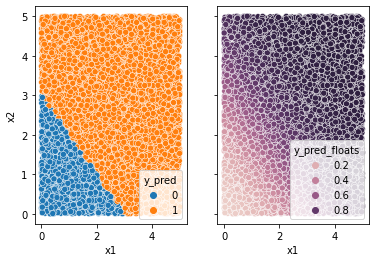

In [6]:
# plot our predictions
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(x='x1',y='x2',data=df_rand,hue='y_pred',ax=ax1)
sns.scatterplot(x='x1',y='x2',data=df_rand,hue='y_pred_floats',ax=ax2)

### Coursera XNOR Neural Network

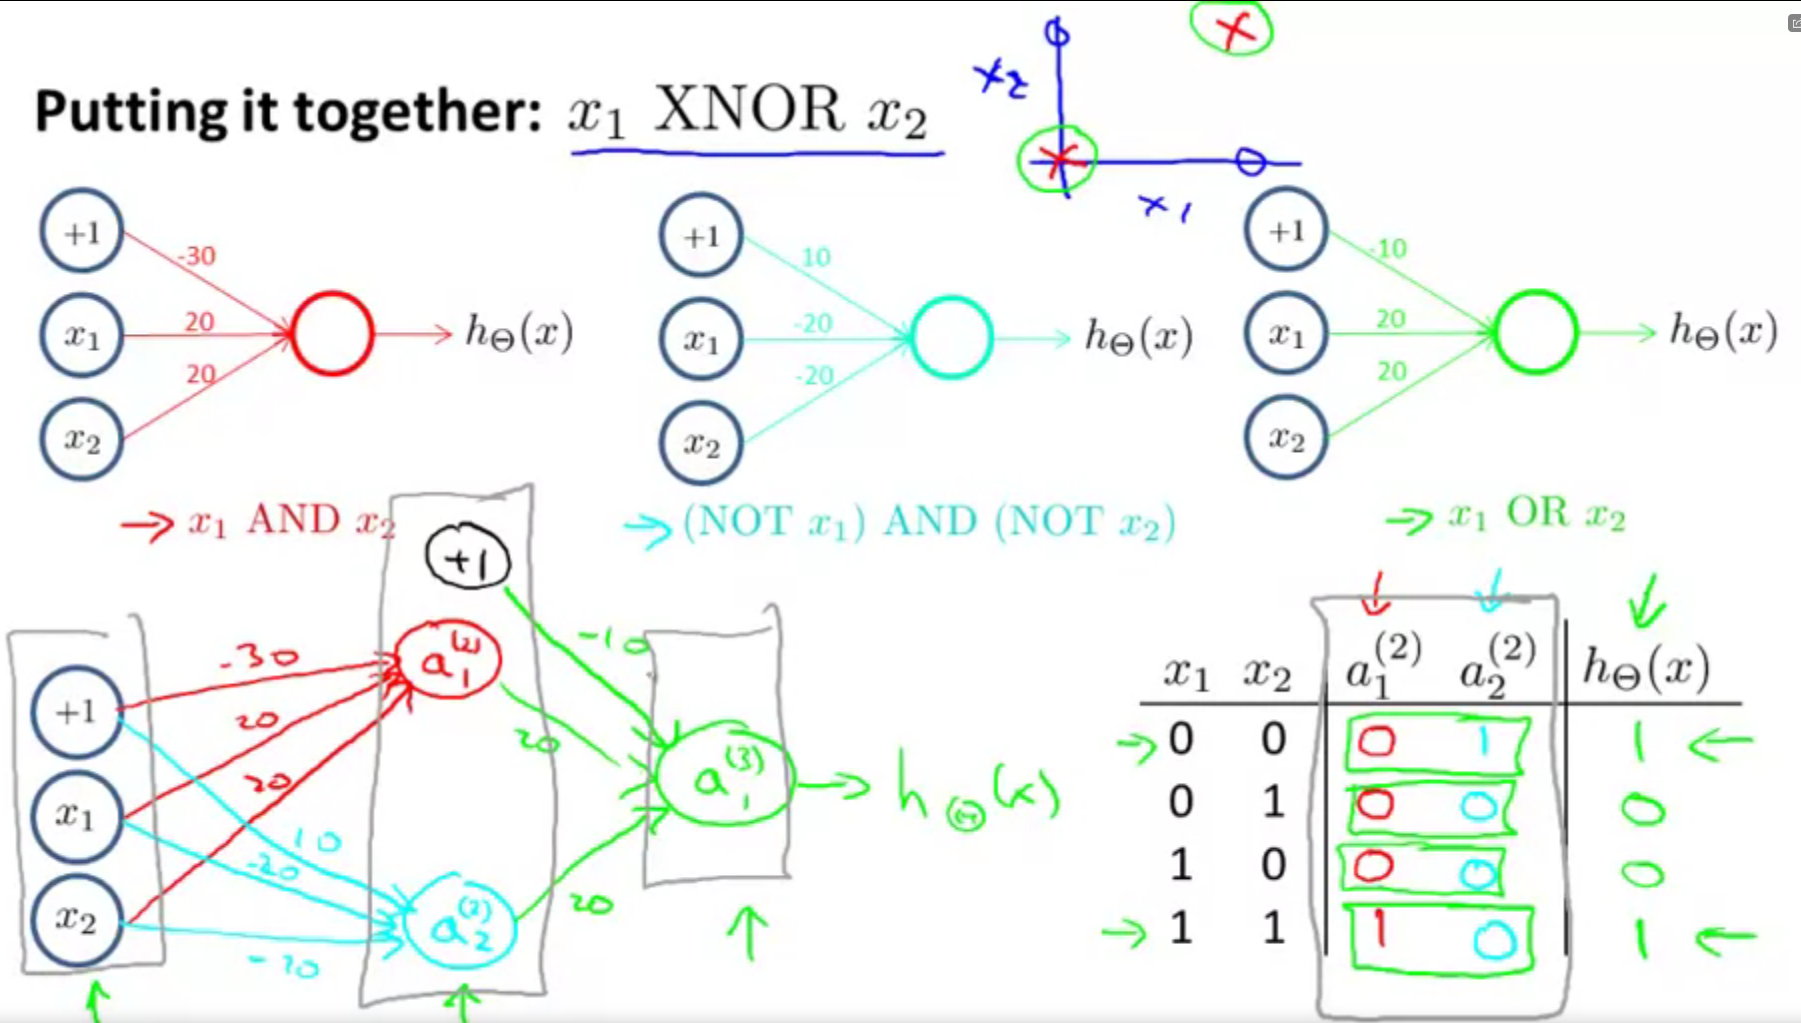

In [6]:
# Many of the following cells are based on this diagram
from IPython.display import Image
Image(filename='neuron_XNOR.png') 

Create the truth table as a dataframe. 

In [20]:
# This comes from the truth table above
df_xnor = pd.DataFrame()
df_xnor['x1'] = [0,0,1,1]
df_xnor['x2'] = [0,1,0,1]
df_xnor['y'] = [1,0,0,1] # these are our labeled predictions


<AxesSubplot:xlabel='x1', ylabel='x2'>

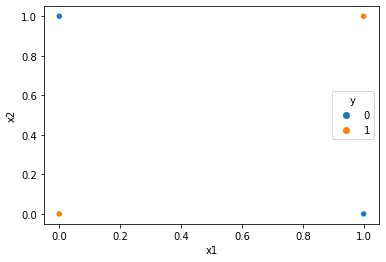

In [8]:
# Plot the XNOR graph from above
sns.scatterplot(x='x1',y='x2',data=df_xnor, hue='y')

In [10]:
# define a neural network
def neural_network_2neurons(series):
    # data comes in as a series in pandas
    # this is our input layer
    x1 = series[0]
    x2 = series[1]
    
    # These are our hidden layer
    # Andrew Ng's equations with weights
    # Neuron a1
    z1 = -30 + 20*x1 + 20*x2
    a1 = 1/(1 + np.e**-z1)
    
    # Neuron a2
    z2 = 10 + -20*x1 -20*x2
    a2 = 1/(1 + np.e**-z2)
    
    # This is the output layer
    # Output Neuron
    z3 = -10 + 20*a1 + 20*a2 #+20*a3 -30*a4
    h0 = 1/(1 + np.e**-z3)
    
    # convert to 0 or 1 so that we can apply 'hue' in sns
    if h0 >= 0.5:
        h0 = 1
    else:
        h0 = 0
    
    return h0

# predict values
df_xnor['y_pred'] = df_xnor[['x1','x2']].apply(neural_network_2neurons, axis =1)

# Our 2 Neuron Network makes correct predictions
# y is the actual values and y_pred is the predicted value
df_xnor

,x1,x2,y,y_pred
0,0,0,1,1
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


### But How???? 

What's going on here? What does the decision boundary look like? 

To find out, let's plot! 

In [11]:
# Create a df with random x1s and x2s. 
pts = 10000 # of points to plot

df_rand = pd.DataFrame()
df_rand['x1'] = np.random.uniform(low=-5, high=5, size=(pts))
df_rand['x2'] = np.random.uniform(low=-5, high=5, size=(pts))
df_rand.head()

,x1,x2
0,2.566107,0.870826
1,0.796403,-3.734628
2,2.222230,-4.287663
3,1.605960,-3.238823
4,-3.501297,2.353736


In [12]:
# Use our Neural Network function `neural_network_2neurons` to predict our random data
df_rand['y_pred'] = df_rand[['x1','x2']].apply(neural_network_2neurons, axis =1)
df_rand.head()

,x1,x2,y_pred
0,2.566107,0.870826,1
1,0.796403,-3.734628,1
2,2.222230,-4.287663,1
3,1.605960,-3.238823,1
4,-3.501297,2.353736,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

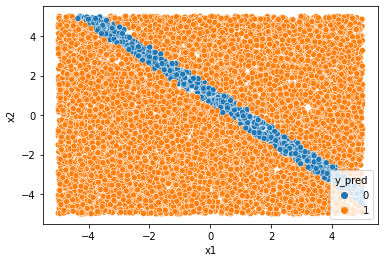

In [14]:
# create a scatterplot of our data
sns.scatterplot(x='x1',y='x2',data=df_rand,hue='y_pred')

### What happens when we change the network? 

What if we add neurons? Or change the equations? 

NOTE: We are NOT adding layers. Just neurons in a layer.

In [15]:
def neural_network_Xneurons(series):
    # data comes in as a series in pandas
    x1 = series[0]
    x2 = series[1]
    
    # Andrew Ng's equations with weights
    # Neuron a1
    z1 = -30 + 20*x1 + 20*x2
    a1 = 1/(1 + np.e**-z1)
    
    # Neuron a2
    z2 = 10 + -20*x1 -20*x2
    a2 = 1/(1 + np.e**-z2)
    
    #add another neuron
    a3 = -2 + x1 -x2
    a3 = 1/(1 + np.e**-a3)
    
    z3 = -10 + 20*a1 + 20*a2 +20*a3 
    h0 = 1/(1 + np.e**-z3)
    
    # convert to 0 or 1 so that we can apply 'hue' in sns
    if h0 >= 0.5:
        h0 = 1
    else:
        h0 = 0
    
    return h0

# predict values
df_rand['y_pred'] = df_rand[['x1','x2']].apply(neural_network_Xneurons, axis =1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

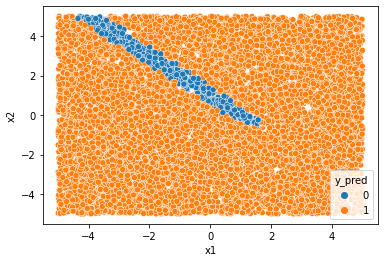

In [16]:
# create a scatterplot of our data
sns.scatterplot(x='x1',y='x2',data=df_rand,hue='y_pred')

# It looks like each neuron is adding a decision boundary. NOTE: That's just MW's intuition. 
# We can see how adding extra neurons can influence our decision boundaries in non-linear ways. 

In [17]:
def neural_network_Xneurons(series):
    # data comes in as a series in pandas
    x1 = series[0]
    x2 = series[1]
    
    # Andrew Ng's equations with weights
    # Neuron a1
    z1 = -30 + 20*x1 + 20*x2
    a1 = 1/(1 + np.e**-z1)
    
    # Neuron a2
    z2 = 10 + -20*x1 -20*x2
    a2 = 1/(1 + np.e**-z2)
    
    #add another neuron
    a3 = -2 + x1 -x2
    a3 = 1/(1 + np.e**-a3)
    
    #add another neuron
    a4 = 2 + x1 +x2
    a4 = 1/(1 + np.e**-a3)

    z3 = -10 + 20*a1 + 20*a2 +20*a3 -30*a4
    h0 = 1/(1 + np.e**-z3)
    
    # convert to 0 or 1 so that we can apply 'hue' in sns
    if h0 >= 0.5:
        h0 = 1
    else:
        h0 = 0
    
    return h0

# predict values
df_rand['y_pred'] = df_rand[['x1','x2']].apply(neural_network_Xneurons, axis =1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

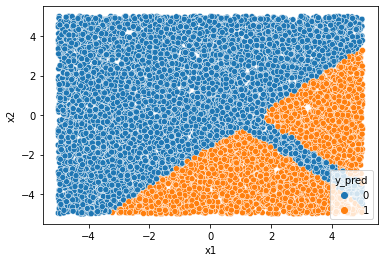

In [18]:
# create a scatterplot of our data
sns.scatterplot(x='x1',y='x2',data=df_rand,hue='y_pred')

# It looks like each neuron is adding a decision boundary. NOTE: That's just MW's intuition. 
# We can see how adding extra neurons can influence our decision boundaries in non-linear ways. 